# Gender Classification with Transfer Learning
1. * Preview to Image
2. * Process
3. * Convert Images to Vector and Resize
4. * Train-Test Split
5. * VGG16 Architecture
6. * Transfer VGG-16 Model Layers to Our Model
7. * Create Validation Set
8. * Training
9. * Visualize
10. * Evaluate Model
11. * Save Model

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

# Preview to Image

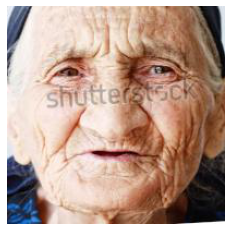

In [4]:
path= '../input/utkface-new/UTKFace' 
img= load_img(path+ "/"+ "100_1_0_20170110183726390.jpg.chip.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
x= img_to_array(img) #convert from image to array
x= np.expand_dims(x, axis=0) 
x/=255 #Normalization
print("image shape: ",x.shape)

image shape:  (1, 200, 200, 3)


# Process

Images have labels in their names.Since labels (1-Female,0-Male) are separated by underscores, we specify this with the split method.Image Name Labels respectively Age_Gender_Ethnicity....jpg

In [6]:
file_list = os.listdir(path) #Go path and list files
print("Number Of İmages: ", len(file_list))
#Gender
gender = [i.split('_')[1] for i in file_list]
gender_labels= ["Male","Female"]

gender_classes = []
y_gender= []
for i in gender:
    i= int(i)
    if i== 0:
        gender_classes.append(0)
    else:
        gender_classes.append(1)
    y_gender.append(i)
    
gender_classes= np.array(gender_classes)
print("gender_classes shape: ",gender_classes.shape) 


Number Of İmages:  23708
gender_classes shape:  (23708,)


# Convert Images to Vector and Resize

In [7]:
x_data=[]
for file in file_list:
    img= cv2.imread(path+'/'+file)
    img=cv2.resize(img,(48,48)) # (200,200)--->(48,48)
    x_data.append(img)
x_data= np.array(x_data)
print("x_data shape: ",x_data.shape)

x_data shape:  (23708, 48, 48, 3)


# Train-Test Split

In [8]:
#%%Train-Test Split for gender
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,gender_classes,test_size=0.2,
                                               shuffle=True,random_state=42)
print("Samples in Training:",x_train.shape)
print("Samples in Testing:",x_test.shape)

y_train= to_categorical(y_train,num_classes=2) #one hot encoding
y_test= to_categorical(y_test,num_classes=2) #[1,0, ...]---> [[1,0],[0,1], ...]

print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

input_shape= x_train.shape[1:] #we don't take the number of samples
print("input shape: ",input_shape)

Samples in Training: (18966, 48, 48, 3)
Samples in Testing: (4742, 48, 48, 3)
y_train shape:  (18966, 2)
y_test shape:  (4742, 2)
input shape:  (48, 48, 3)


# VGG-16 Architecture

In [9]:
#%% vgg16
from keras.applications.vgg16 import VGG16 

vgg= VGG16(include_top= False,weights="imagenet",input_shape=input_shape)

#include_top=False bencause I'll modify fully connected layers
# weights='imagenet' because I want the weights used in the imagenet competition
print(vgg.summary())

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

# Transfer VGG-16 Model Layers to Our Model

In [10]:
vgg_layer_list= vgg.layers #I keep the layers in the vgg_layer_list

model= Sequential() #I create my model

for layer in vgg_layer_list: 
    model.add(layer)        # I transfer vgg layers to my model

for layer in model.layers:
    layer.trainable= False  #I'll use vgg16 weights so trainable=False

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="sigmoid"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       2

# Create Validation Dataset

In [11]:
x_val= x_train[14200:]
partial_x_train=x_train[:14200]

y_val= y_train[14200:]
partial_y_train=y_train[:14200]

# Training

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-3),
              metrics=["accuracy"])

In [13]:


hist= model.fit(partial_x_train,partial_y_train,
                validation_data=(x_val,y_val),
                epochs=50,
                batch_size= 64)

Epoch 1/50
222/222 [==============================] - 8s 18ms/step - loss: 0.9457 - accuracy: 0.6461 - val_loss: 0.5190 - val_accuracy: 0.7499
Epoch 2/50
222/222 [==============================] - 3s 15ms/step - loss: 0.5207 - accuracy: 0.7498 - val_loss: 0.5571 - val_accuracy: 0.7486
Epoch 3/50
222/222 [==============================] - 3s 15ms/step - loss: 0.5016 - accuracy: 0.7667 - val_loss: 0.4728 - val_accuracy: 0.7772
Epoch 4/50
222/222 [==============================] - 4s 16ms/step - loss: 0.4815 - accuracy: 0.7726 - val_loss: 0.4666 - val_accuracy: 0.7919
Epoch 5/50
222/222 [==============================] - 3s 15ms/step - loss: 0.4663 - accuracy: 0.7830 - val_loss: 0.4690 - val_accuracy: 0.7847
Epoch 6/50
222/222 [==============================] - 3s 15ms/step - loss: 0.4624 - accuracy: 0.7877 - val_loss: 0.4690 - val_accuracy: 0.7948
Epoch 7/50
222/222 [==============================] - 3s 15ms/step - loss: 0.4522 - accuracy: 0.7947 - val_loss: 0.4671 - val_accuracy: 0.7958

# Visualize

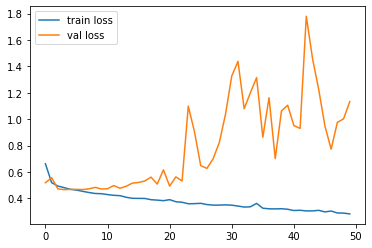

<Figure size 432x288 with 0 Axes>

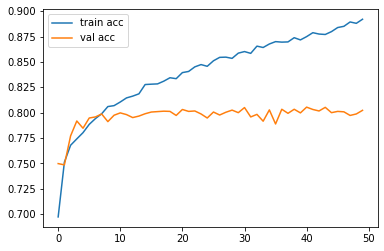

<Figure size 432x288 with 0 Axes>

In [14]:
#Train and Validation Loss
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="val loss")
plt.legend()
fig1 = plt.gcf() # I create figure because ı want to save
plt.show()
plt.draw()
fig1.savefig('genderclfloss.png')

plt.figure()

##Train and Validation Accuracy
plt.plot(hist.history["accuracy"],label="train acc")
plt.plot(hist.history["val_accuracy"],label="val acc")
plt.legend()

fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('genderclfacc.png')

# Evaluate to Model

In [15]:
results= model.evaluate(x_test,y_test)
print("Results: ",results)

149/149 [==============================] - 1s 8ms/step - loss: 1.0045 - accuracy: 0.7845
Results:  [1.0045454502105713, 0.7844791412353516]


# Save Model

* Save as json

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


* Save as h5

In [17]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


* Save as weights

In [18]:
model.save_weights("model_weights.h5")

In [19]:
model.save("gender.model")

This is my first notebook so sorry if I made a mistake. Thanks :)